# Third Phase Evaluation Project - Rainfall Weather Forecasting

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
Df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
Df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
Df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
Df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
for column in Df.columns:
    unique_val = Df[column].nunique()
    print(f"Column: {column}")
    print(unique_val)
    print('\n')

Column: Date
3004


Column: Location
12


Column: MinTemp
285


Column: MaxTemp
331


Column: Rainfall
250


Column: Evaporation
116


Column: Sunshine
140


Column: WindGustDir
16


Column: WindGustSpeed
52


Column: WindDir9am
16


Column: WindDir3pm
16


Column: WindSpeed9am
34


Column: WindSpeed3pm
35


Column: Humidity9am
90


Column: Humidity3pm
94


Column: Pressure9am
384


Column: Pressure3pm
374


Column: Cloud9am
9


Column: Cloud3pm
9


Column: Temp9am
304


Column: Temp3pm
328


Column: RainToday
2


Column: RainTomorrow
2




In [8]:
for val in Df.columns:
    values = Df[val].value_counts()
    print(f"Column: {val}")
    print(values)
    print('\n')

Column: Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Column: Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


Column: MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


Column: MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


Column: Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ...

In [9]:
Df['Date']=pd.to_datetime(Df['Date'])

In [10]:
Df['Day'] = Df['Date'].dt.day
Df['Month'] = Df['Date'].dt.month              #Now, converted into datetime and extracted in 3 different columns
Df['Year'] = Df['Date'].dt.year

Df.drop(["Date"], axis=1, inplace=True)

In [11]:
Df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


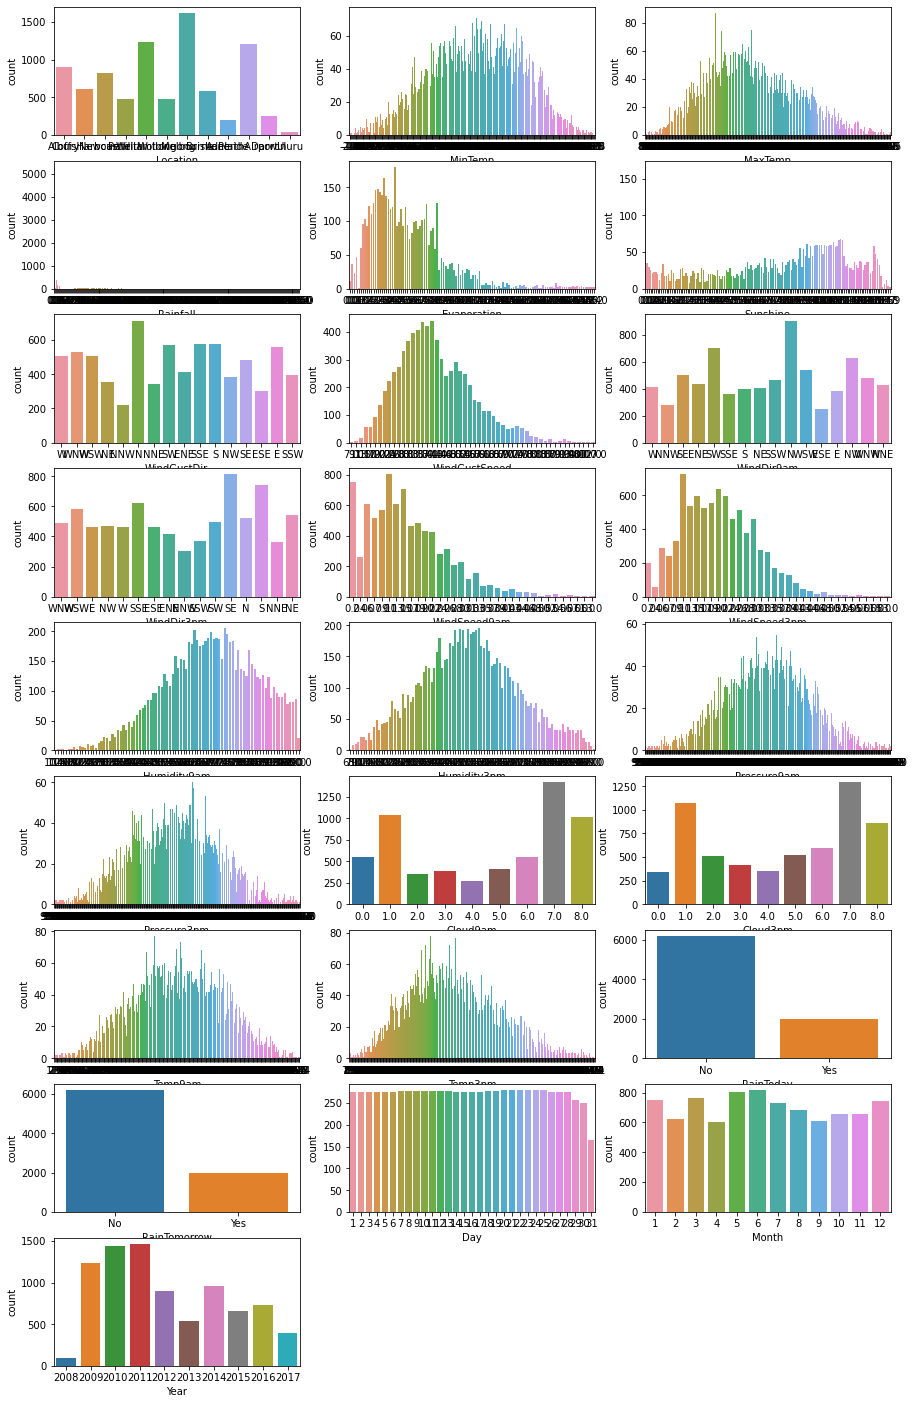

In [12]:
plt.subplots(figsize=(15, 25))
for i in enumerate(Df.columns):
    plt.subplot(9,3, i[0] + 1)
    sns.countplot(Df[i[1]])
plt.show()

<AxesSubplot:xlabel='Location', ylabel='count'>

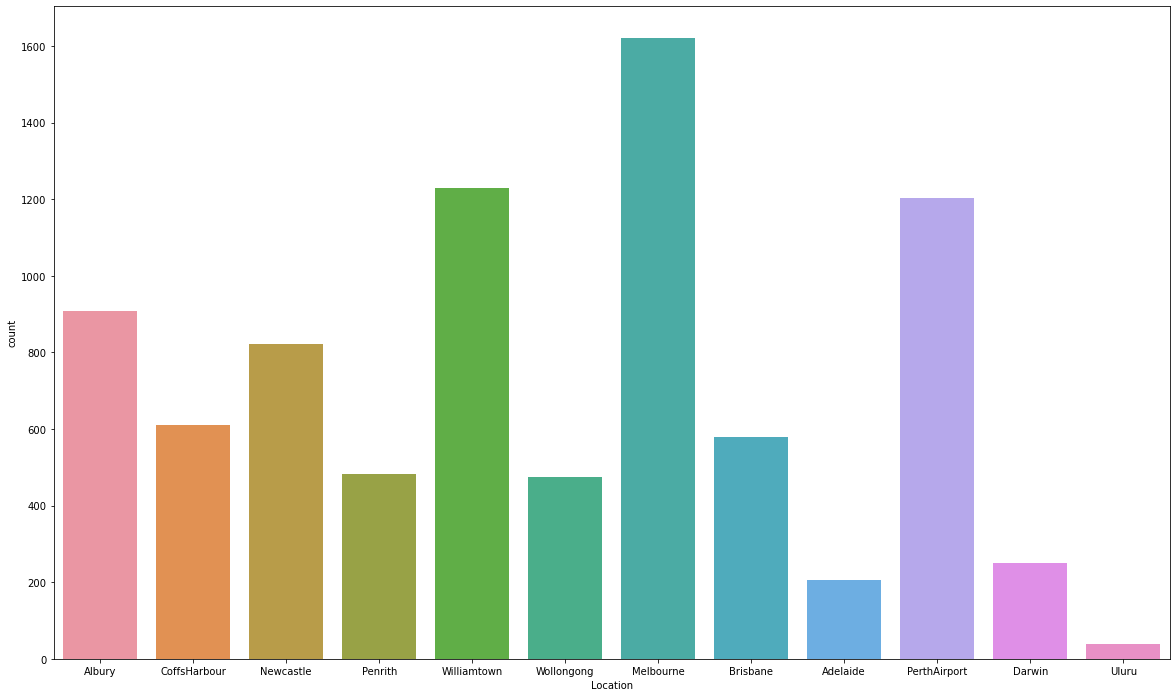

In [13]:
plt.figure(figsize =(20,12))
sns.countplot(Df["Location"])

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

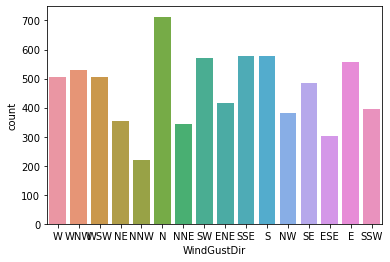

In [14]:
sns.countplot(Df["WindGustDir"])

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

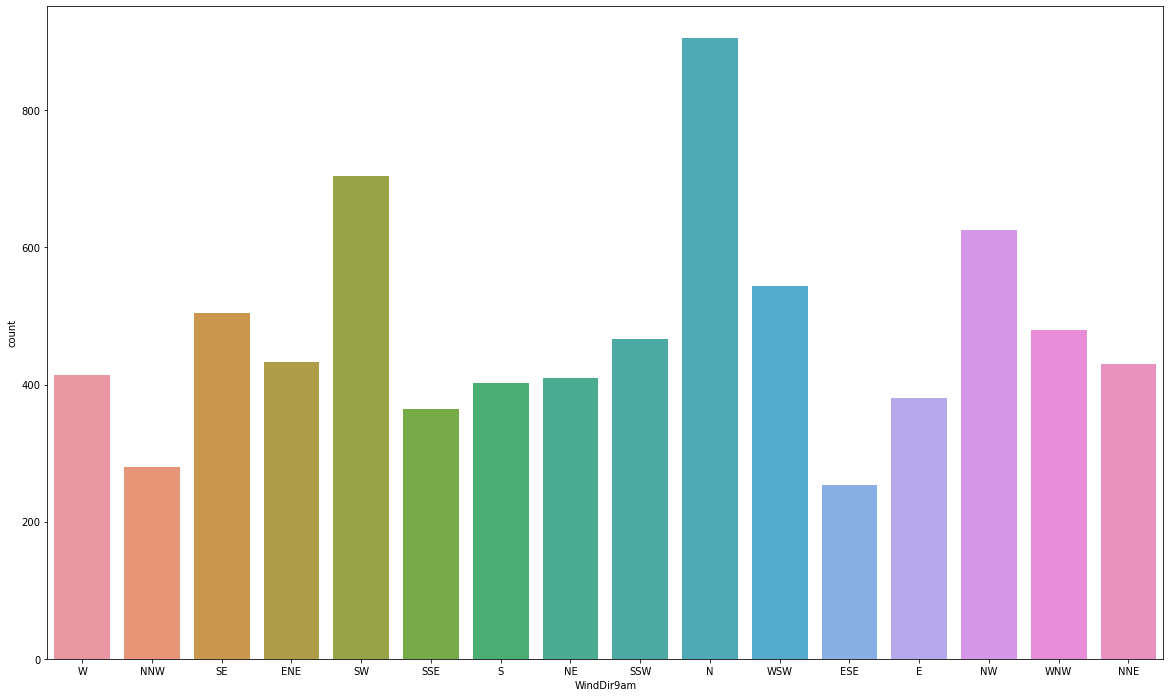

In [15]:
#Lets check the direction of the wind

plt.figure(figsize =(20,12))
sns.countplot(Df["WindDir9am"])

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

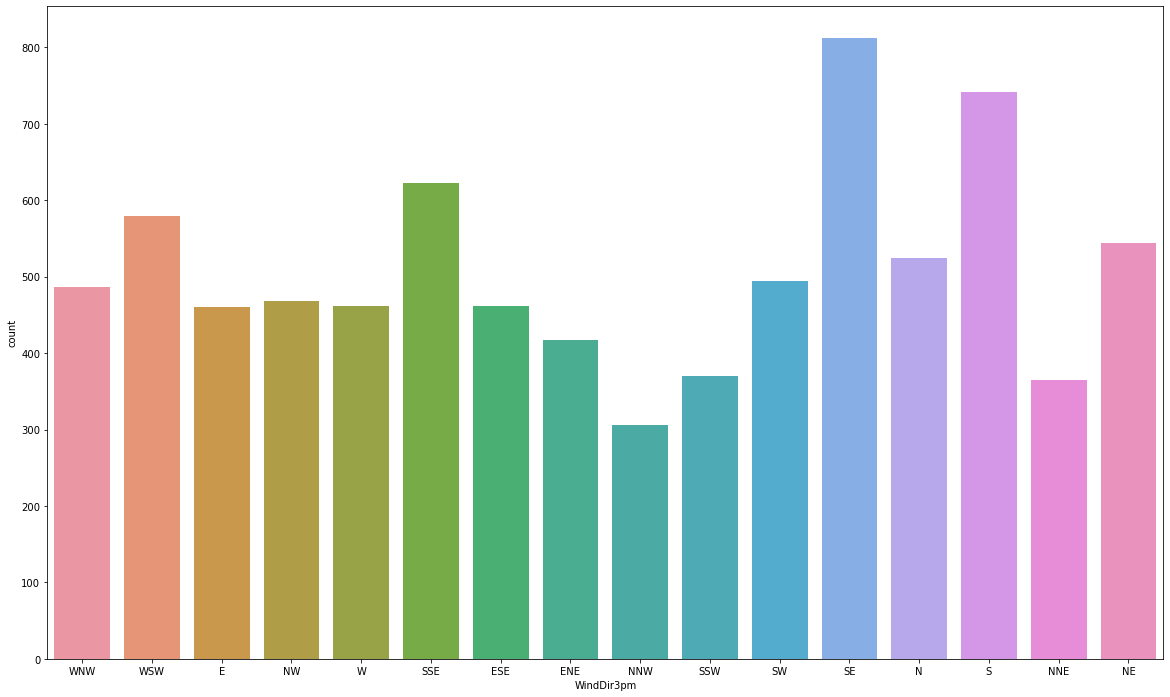

In [16]:
plt.figure(figsize =(20,12))
sns.countplot(Df["WindDir3pm"])

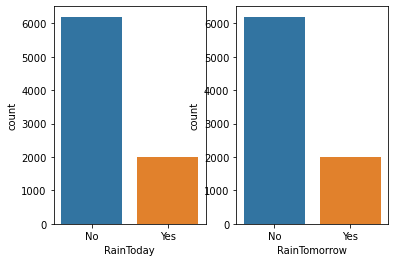

In [17]:
plt.subplot(1, 2, 1)
sns.countplot(Df["RainToday"])
plt.subplot(1,2,2)
sns.countplot(Df["RainTomorrow"])
plt.show()

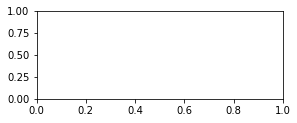

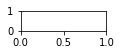

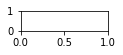

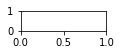

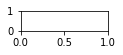

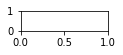

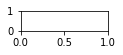

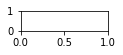

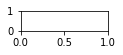

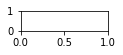

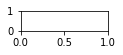

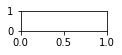

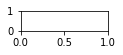

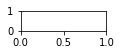

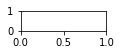

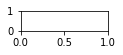

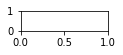

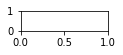

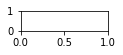

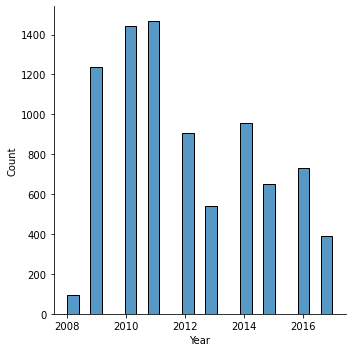

In [18]:
plt.subplots(figsize=(15, 25))
for i, col in enumerate(Df.columns):
    if Df[col].dtype != "object":
        plt.subplot(13, 3, i + 1)
        sns.displot(Df[col])
plt.show()


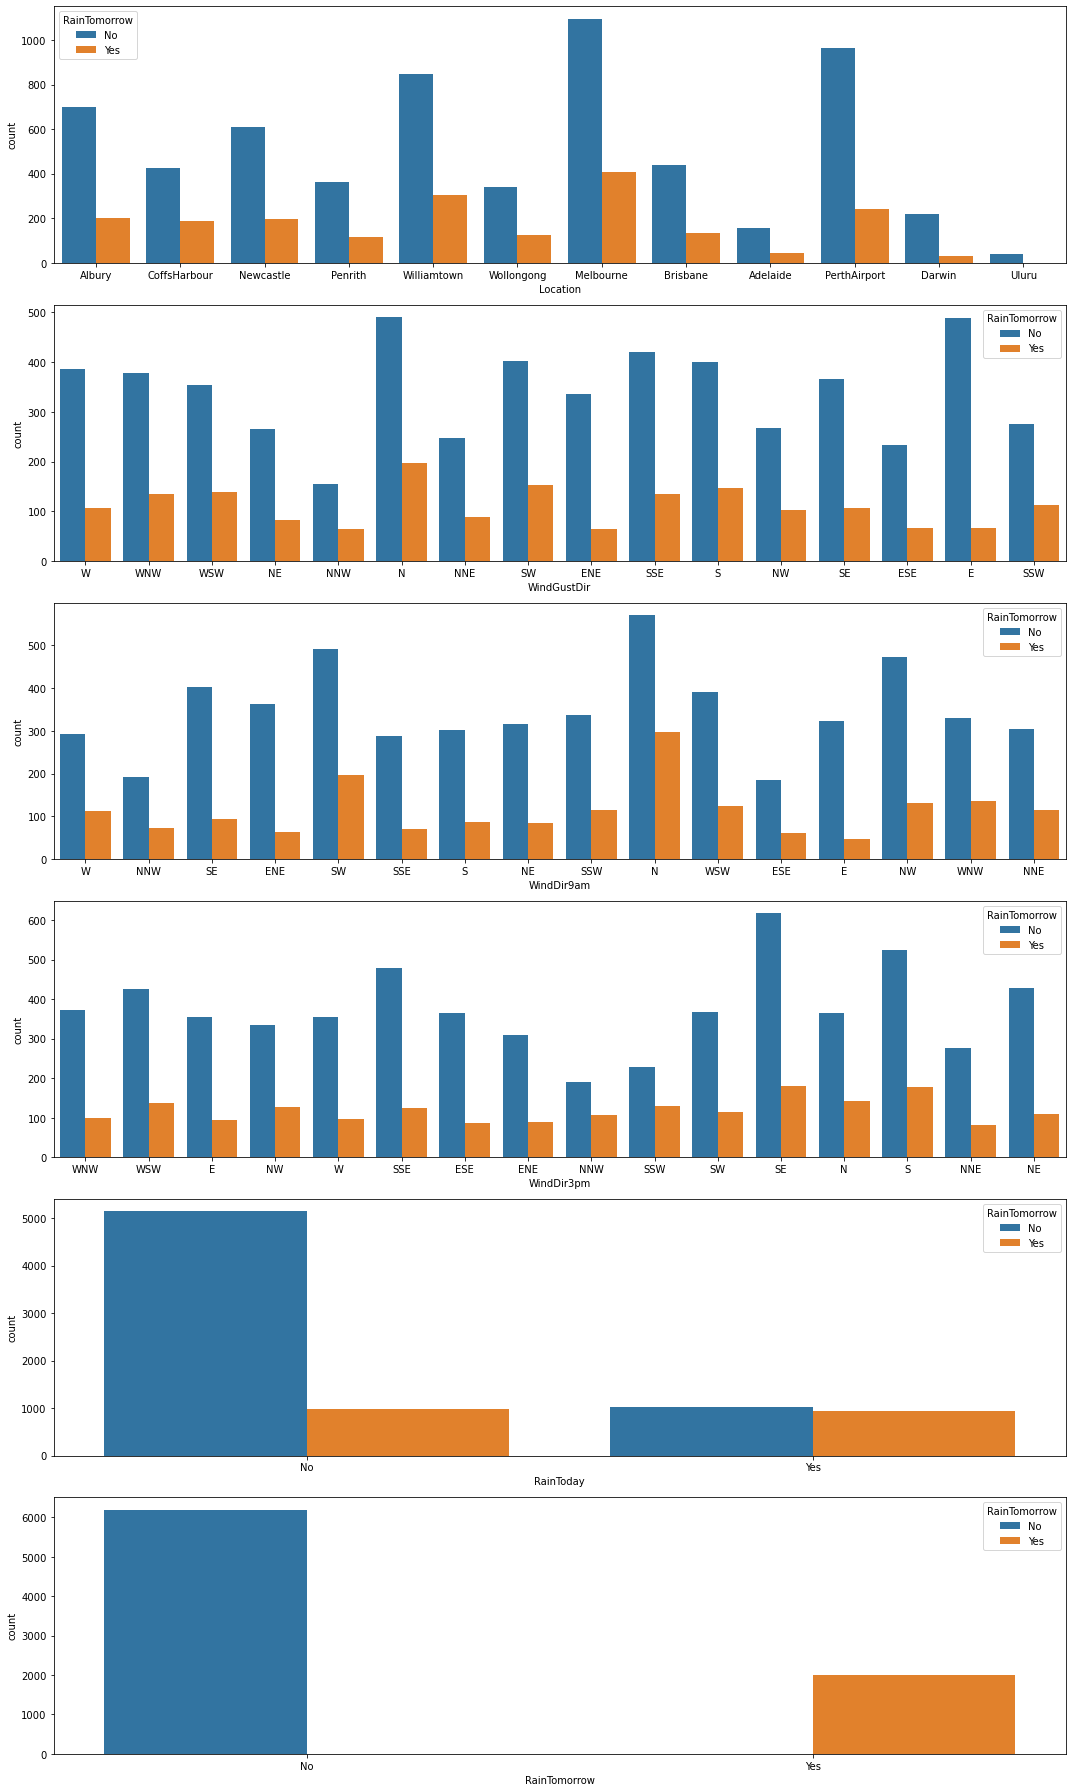

In [19]:
plt.figure(figsize=(15, 25))  # Change to a single figure with desired size
num = 1
for i, col in enumerate(Df.columns):
    if Df[col].dtype == "object":
        if num<=6:
            plt.subplot(6, 1, num)  # Update the subplot to 7 rows
            sns.countplot(Df[col], hue=Df["RainTomorrow"])
            
        num+=1

plt.tight_layout()  # Optional: Adjust the spacing between subplots
plt.show()

In [20]:
Df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [21]:
null_val = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
null_value = ['Cloud9am', 'Cloud3pm']
Val = []

In [22]:
for i in Df.columns:
    if Df[i].dtypes == 'object':
        Val.append(i)
Val

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [24]:
Df['MinTemp'] =Df['MinTemp'].fillna(Df['MinTemp'].mean())
Df['MaxTemp']= Df['MaxTemp'].fillna(Df['MaxTemp'].mean())

In [25]:
Df['Rainfall']=Df['Rainfall'].fillna(Df['Rainfall'].mean())
Df['WindGustSpeed']=Df['WindGustSpeed'].fillna(Df['WindGustSpeed'].mean())

In [29]:
Df['Evaporation'].fillna(Df['Evaporation'].mean(), inplace=True)
Df['WindSpeed9am'].fillna(Df['WindSpeed9am'].mean(), inplace=True)

Df['Sunshine'].fillna(Df['Sunshine'].mean(), inplace=True)
Df['WindSpeed3pm'].fillna(Df['WindSpeed3pm'].mean(), inplace=True)


In [30]:
Df['Humidity9am'].fillna(Df['Humidity9am'].mean(), inplace=True)
Df['Humidity3pm'].fillna(Df['Humidity3pm'].mean(), inplace=True)


In [28]:
Df['Pressure9am'].fillna(Df['Pressure9am'].mean(), inplace=True)
Df['Pressure3pm'].fillna(Df['Pressure3pm'].mean(), inplace=True)


In [31]:
Df['Temp9am'].fillna(Df['Temp9am'].mean(), inplace=True)
Df['Temp3pm'].fillna(Df['Temp3pm'].mean(), inplace=True)

In [33]:
Df['Cloud9am'].fillna(Df['Cloud9am'].median(), inplace=True)
Df['Cloud3pm'].fillna(Df['Cloud3pm'].median(), inplace=True)

In [34]:
Df['Location'].fillna(Df['Location'].mode()[0], inplace=True)
Df['RainToday'].fillna(Df['RainToday'].mode()[0], inplace=True)
Df['RainTomorrow'].fillna(Df['RainTomorrow'].mode()[0], inplace=True)

In [35]:
Df['WindDir9am'].fillna(Df['WindDir9am'].mode()[0], inplace=True)
Df['WindDir3pm'].fillna(Df['WindDir3pm'].mode()[0], inplace=True)

In [36]:
Df['WindGustDir'].fillna(Df['WindGustDir'].mode()[0], inplace=True)

In [37]:
Df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [38]:
from sklearn.preprocessing import OrdinalEncoder

for column in Df.columns:
    if Df[column].dtypes == "object":
        OE = OrdinalEncoder(categories=[Df[column].unique()])
        Df[column] = OE.fit_transform(Df[column].values.reshape(-1, 1))

In [39]:
Df.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Day                int64
Month              int64
Year               int64
dtype: object

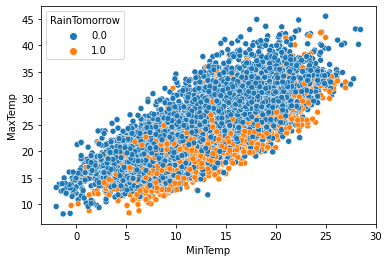

In [40]:
sns.scatterplot(Df['MinTemp'],Df['MaxTemp'],hue='RainTomorrow',data=Df)
plt.show()

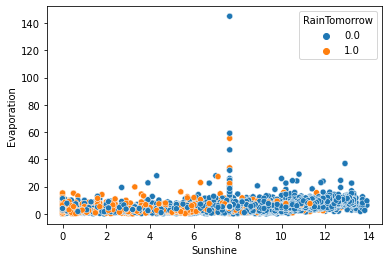

In [41]:
sns.scatterplot(Df['Sunshine'],Df['Evaporation'],hue='RainTomorrow',data=Df)
plt.show()

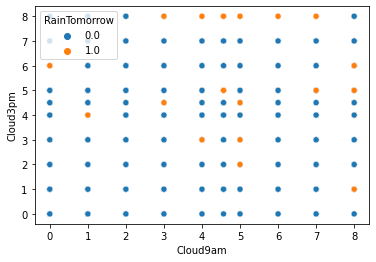

In [43]:
sns.scatterplot(Df['Cloud9am'],Df['Cloud3pm'],hue='RainTomorrow',data=Df)
plt.show()

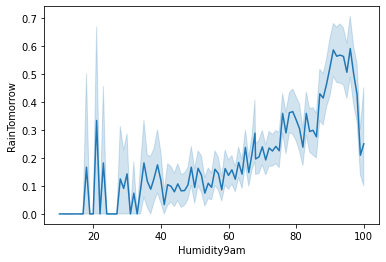

In [45]:
sns.lineplot(x ='Humidity9am',y='RainTomorrow',data=Df)
plt.show()

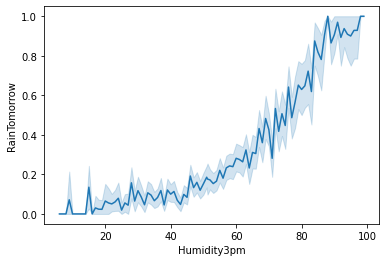

In [46]:
sns.lineplot(Df['Humidity3pm'],y='RainTomorrow',data=Df)
plt.show()

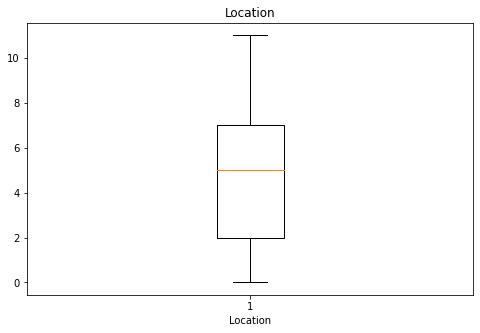

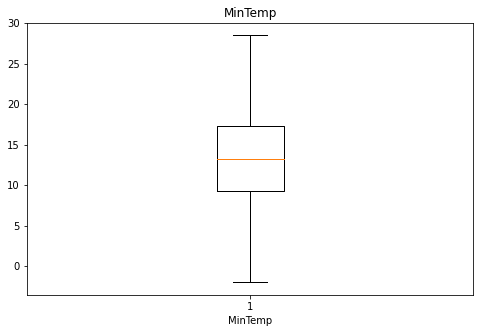

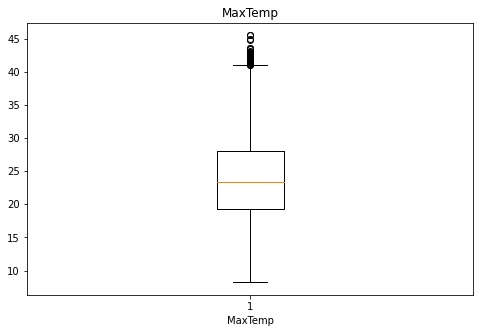

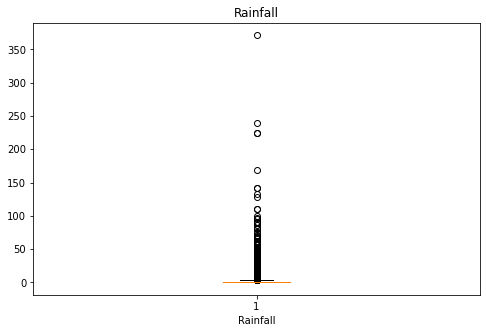

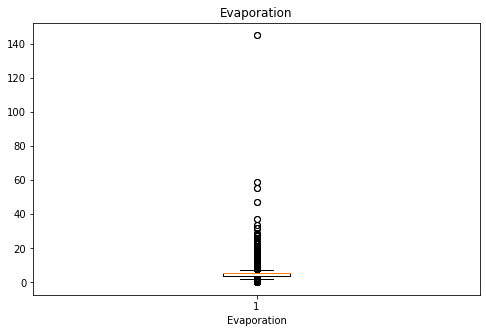

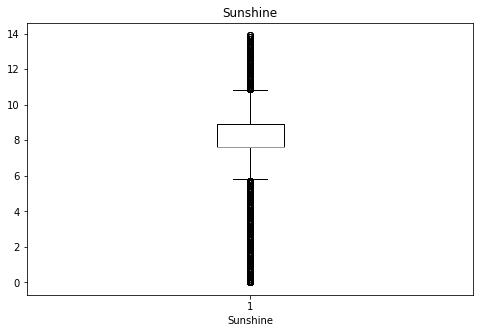

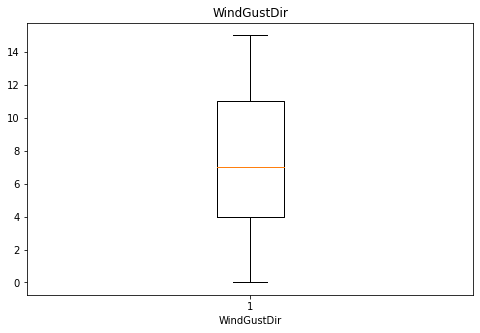

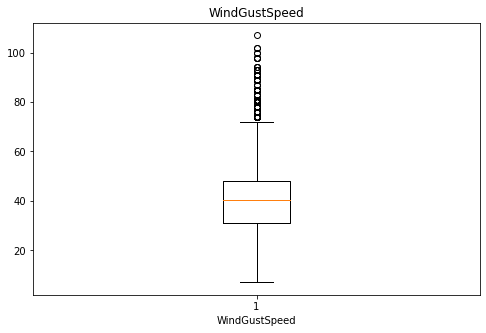

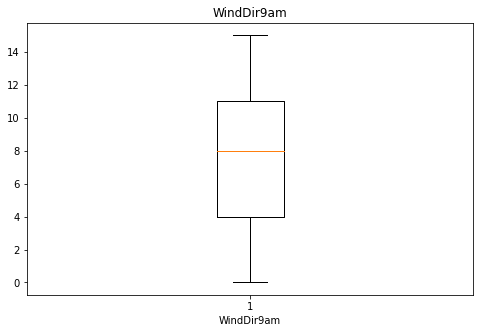

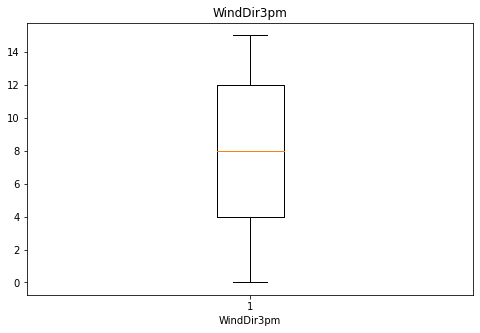

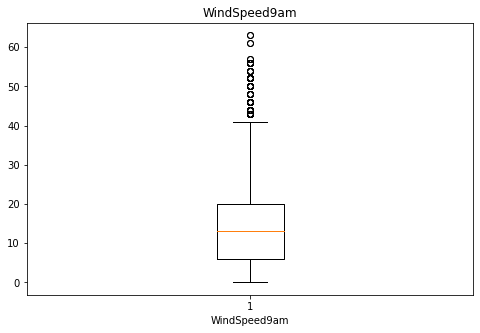

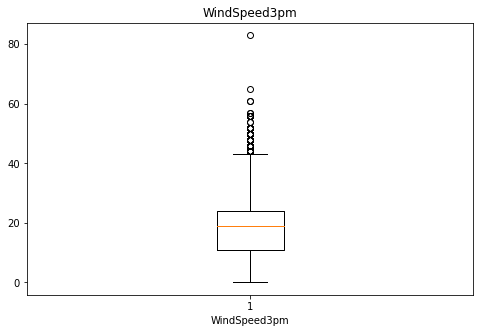

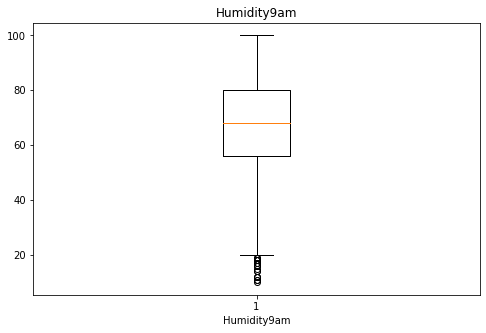

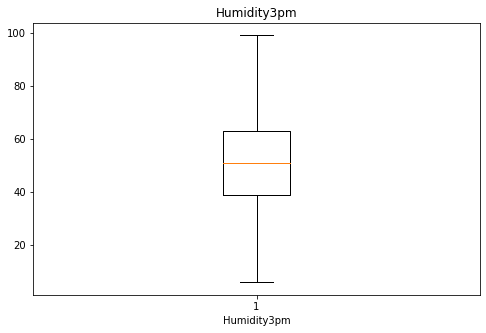

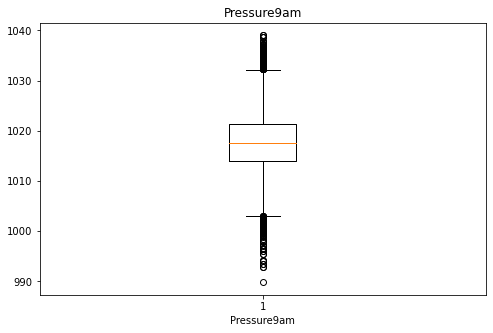

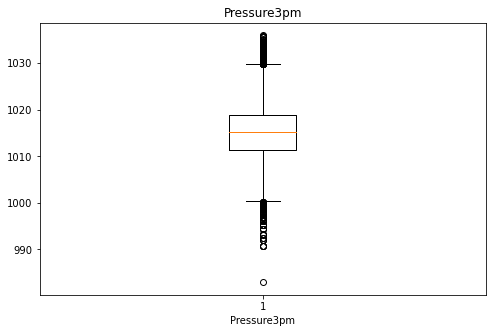

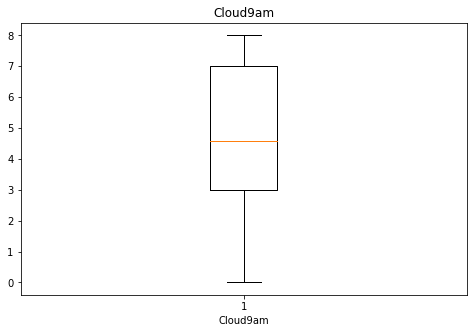

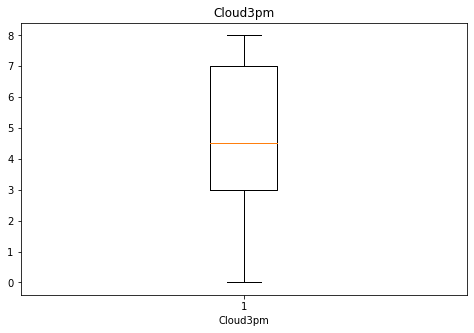

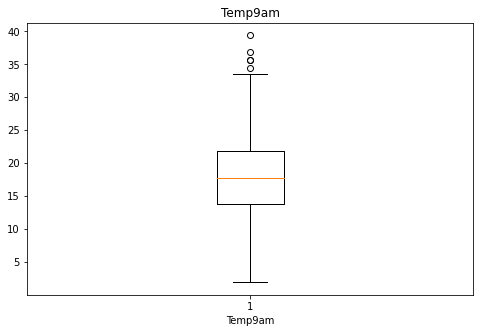

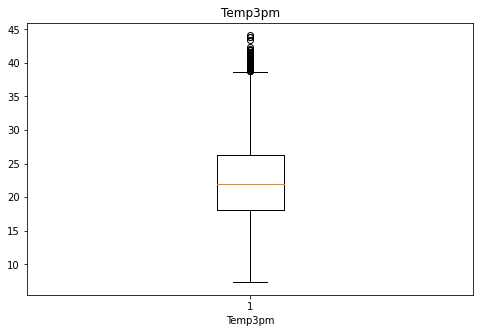

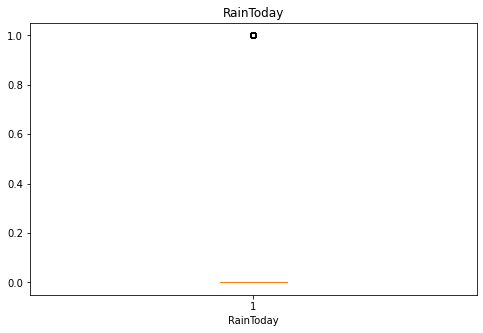

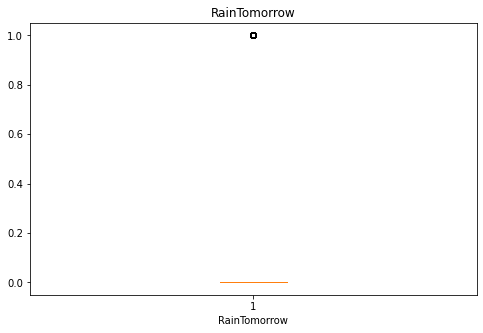

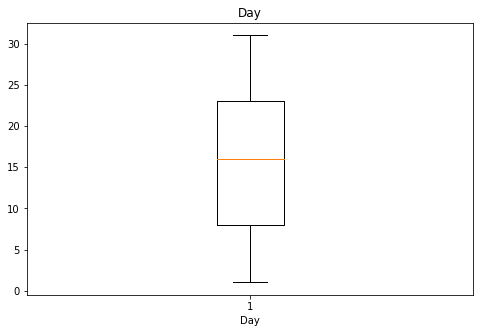

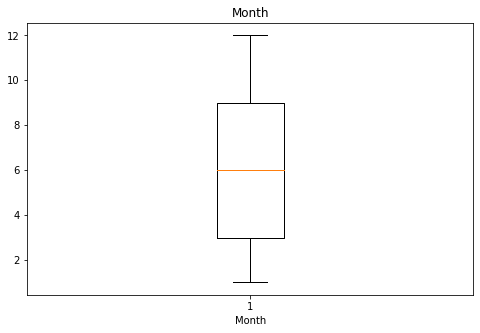

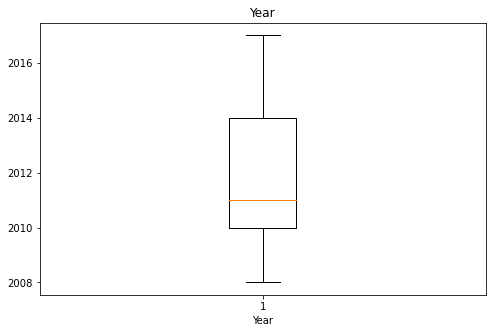

In [47]:
for col in Df.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(Df[col], vert=True)
    plt.title(col)
    plt.xlabel(col)
    plt.show()

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(Df))
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [49]:
new_df =Df[(z<3).all(axis=1)]
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,0.0,13.4,22.900000,0.6,5.389395,7.632205,0.0,44.000000,0.0,0.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,0.0,7.4,25.100000,0.0,5.389395,7.632205,1.0,44.000000,1.0,1.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,0.0,12.9,25.700000,0.0,5.389395,7.632205,2.0,46.000000,0.0,1.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,0.0,9.2,28.000000,0.0,5.389395,7.632205,3.0,24.000000,2.0,2.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,0.0,17.5,32.300000,1.0,5.389395,7.632205,0.0,41.000000,3.0,3.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,11.0,2.8,23.400000,0.0,5.389395,7.632205,14.0,31.000000,2.0,7.0,...,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0,21,6,2017
8421,11.0,3.6,25.300000,0.0,5.389395,7.632205,4.0,22.000000,2.0,12.0,...,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0,22,6,2017
8422,11.0,5.4,26.900000,0.0,5.389395,7.632205,5.0,37.000000,2.0,0.0,...,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0,23,6,2017
8423,11.0,7.8,27.000000,0.0,5.389395,7.632205,12.0,28.000000,5.0,12.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24,6,2017


In [50]:
Df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.165761,0.142541,-0.041452,0.031072,0.095019,0.149644,0.143151,-0.005839,-0.112645,...,-0.045801,-0.121723,-0.104322,0.179210,0.137665,-0.044582,-0.044179,0.002890,0.017288,0.069071
MinTemp,0.165761,1.000000,0.717522,0.087684,0.254965,0.056184,0.152939,0.230058,-0.066303,0.044324,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.142541,0.717522,1.000000,-0.087451,0.322405,0.378403,0.133165,0.139998,-0.012844,-0.005220,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,-0.041452,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.011102,0.086000,-0.002192,-0.009246,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.031072,0.254965,0.322405,0.023517,1.000000,0.226001,0.073477,0.136371,0.015346,-0.066849,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.095019,0.056184,0.378403,-0.169432,0.226001,1.000000,0.096824,-0.013778,-0.015805,-0.011830,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustDir,0.149644,0.152939,0.133165,0.011102,0.073477,0.096824,1.000000,-0.054493,-0.042240,0.065260,...,0.122143,-0.016757,-0.059198,0.152986,0.140363,-0.019116,-0.030886,-0.009401,-0.087737,0.069438
WindGustSpeed,0.143151,0.230058,0.139998,0.086000,0.136371,-0.013778,-0.054493,1.000000,0.026369,-0.066860,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindDir9am,-0.005839,-0.066303,-0.012844,-0.002192,0.015346,-0.015805,-0.042240,0.026369,1.000000,-0.040150,...,-0.002943,0.000149,0.009362,-0.036360,-0.014100,-0.031861,0.007715,-0.000445,0.018650,0.188272
WindDir3pm,-0.112645,0.044324,-0.005220,-0.009246,-0.066849,-0.011830,0.065260,-0.066860,-0.040150,1.000000,...,0.108215,-0.009934,0.019156,0.019475,-0.009436,-0.038342,0.016082,-0.002863,-0.023783,-0.079966


<AxesSubplot:>

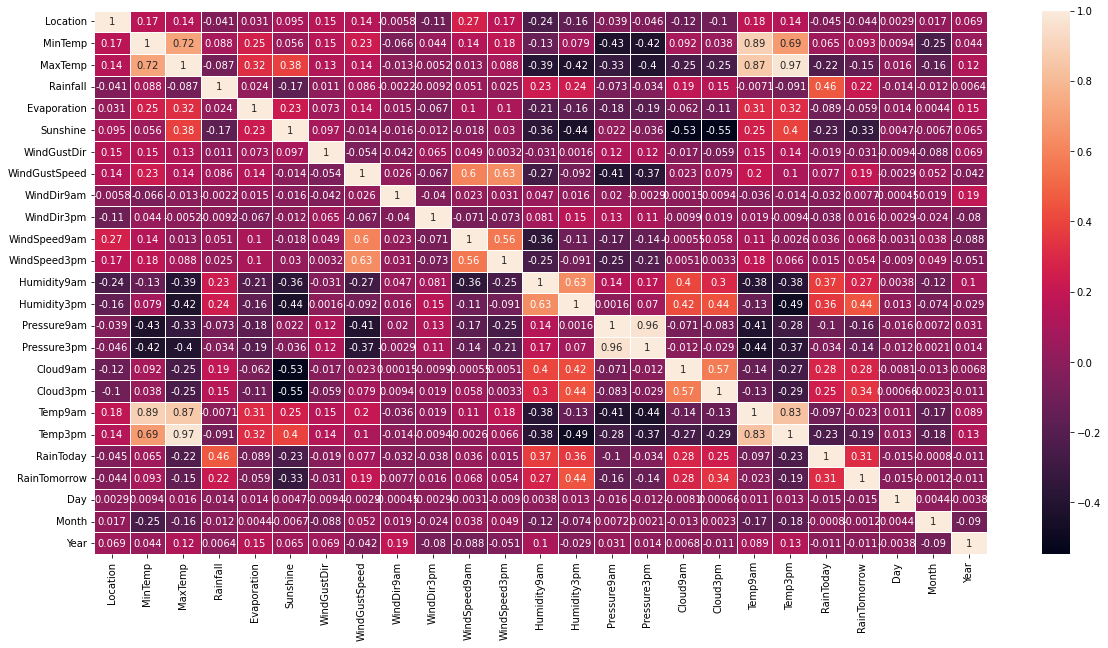

In [51]:
plt.subplots(figsize=(20, 10))
sns.heatmap(Df.corr(), annot=True, linewidth=1)

In [52]:
Df.shape

(8425, 25)

In [53]:
new_df.shape

(7987, 25)

In [54]:
data_loss=((8425-7987)/8425*100)                       # Checking of data loss in dataset after removal of outliers
data_loss

5.198813056379822

In [55]:
new_df.skew()

Location         0.005430
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.150994
WindGustSpeed    0.506897
WindDir9am      -0.017985
WindDir3pm      -0.159229
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

Here, we can observe the skewness is present and more than +/-0.5 should be treated.

In [58]:
from sklearn.preprocessing import power_transform

new_df[['Rainfall','Evaporation']]=power_transform(new_df[['Rainfall','Evaporation']],method='yeo-johnson')

In [61]:
new_df.skew()

Location         0.005430
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         0.670707
Evaporation      0.138827
Sunshine        -0.035128
WindGustDir      0.150994
WindGustSpeed    0.506897
WindDir9am      -0.017985
WindDir3pm      -0.159229
WindSpeed9am     0.005738
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

In [74]:
new_df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.176044,0.149292,-0.055107,0.023343,0.146360,0.156067,0.151897,-0.009979,-0.118814,...,-0.046612,-0.118583,-0.105313,0.186685,0.145250,-0.036584,-0.041447,0.002900,0.014175,0.075675
MinTemp,0.176044,1.000000,0.718598,0.064601,0.372615,0.088925,0.152997,0.231097,-0.070865,0.054400,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.149292,0.718598,1.000000,-0.249173,0.472466,0.403712,0.136545,0.136337,-0.017882,0.005343,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,-0.055107,0.064601,-0.249173,1.000000,-0.207083,-0.277069,-0.039393,0.080262,-0.017809,-0.041606,...,-0.038141,0.307590,0.269842,-0.117738,-0.260476,0.805861,0.304316,-0.023401,0.026123,0.026557
Evaporation,0.023343,0.372615,0.472466,-0.207083,1.000000,0.389920,0.107280,0.186209,-0.001750,-0.042426,...,-0.277891,-0.111916,-0.145288,0.441038,0.458706,-0.167033,-0.090318,0.010933,-0.053429,0.135705
Sunshine,0.146360,0.088925,0.403712,-0.277069,0.389920,1.000000,0.116833,0.024292,-0.024010,-0.010007,...,-0.074531,-0.544331,-0.555354,0.286649,0.419003,-0.223071,-0.314914,0.004677,0.001251,0.023052
WindGustDir,0.156067,0.152997,0.136545,-0.039393,0.107280,0.116833,1.000000,-0.040821,-0.043526,0.067524,...,0.116084,-0.019088,-0.058923,0.156325,0.142310,-0.021425,-0.030612,-0.008688,-0.084654,0.061833
WindGustSpeed,0.151897,0.231097,0.136337,0.080262,0.186209,0.024292,-0.040821,1.000000,0.013935,-0.059679,...,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478,-0.005232,0.045638,-0.035546
WindDir9am,-0.009979,-0.070865,-0.017882,-0.017809,-0.001750,-0.024010,-0.043526,0.013935,1.000000,-0.030693,...,0.006273,0.002013,0.012318,-0.043122,-0.017998,-0.028798,0.011541,0.000374,0.021590,0.183879
WindDir3pm,-0.118814,0.054400,0.005343,-0.041606,-0.042426,-0.010007,0.067524,-0.059679,-0.030693,1.000000,...,0.104145,-0.007291,0.020126,0.029515,-0.001476,-0.042020,0.018837,-0.002232,-0.020268,-0.067763


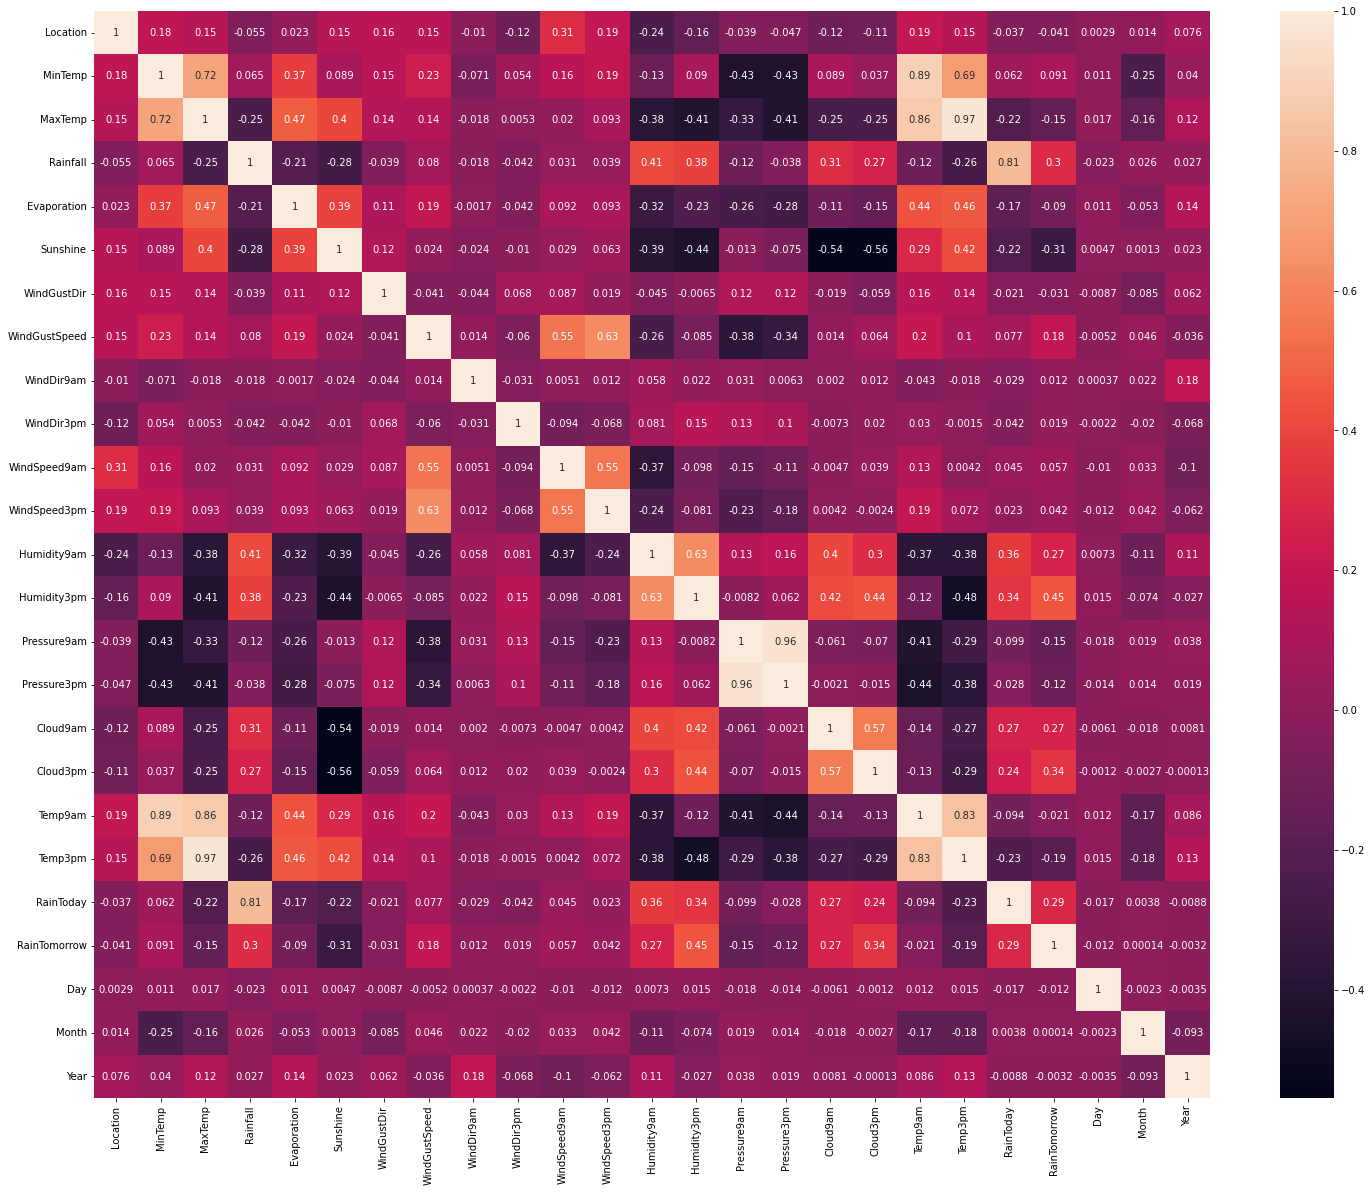

In [78]:
plt.figure(figsize =(25,20))
sns.heatmap(new_df.corr(), annot = True)
plt.show()

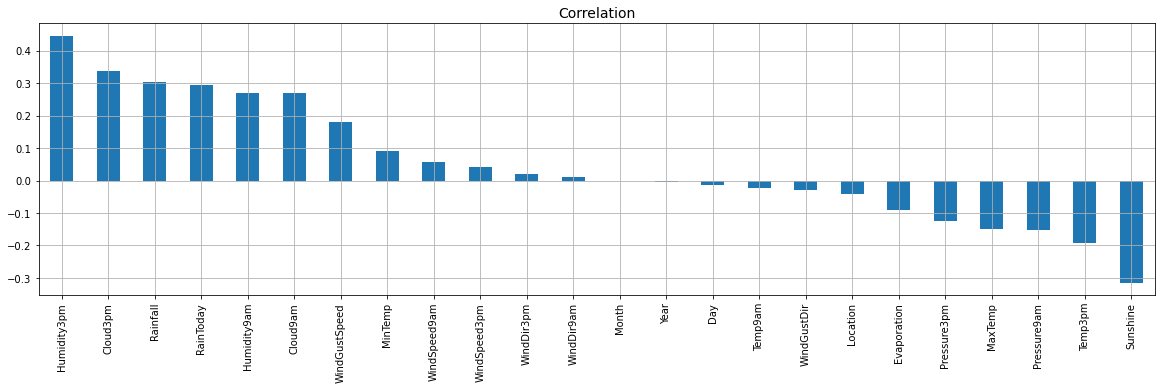

In [79]:
plt.figure(figsize=(20,5))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar', grid=True)
plt.title('Correlation',fontsize=14)
plt.show()

In [68]:
X = Df.drop('RainTomorrow',axis =1)
y = Df['RainTomorrow']

In [69]:
X.shape

(8425, 24)

In [70]:
y.value_counts()

0.0    6434
1.0    1991
Name: RainTomorrow, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

0.0    6434
1.0    6434
Name: RainTomorrow, dtype: int64

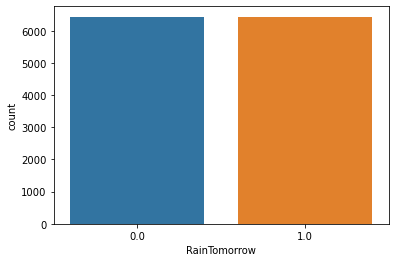

In [72]:
sns.countplot(y)
y.value_counts()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
Rf = RandomForestClassifier()

for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    Rf.fit(X_train, y_train)
    pred_train = Rf.predict(X_train)
    pred_test = Rf.predict(X_test)
    print(f"At random state {i}, the train accuracy is ",{accuracy_score(y_train,pred_train)})
    print(f"At random state {i}, the test accuracy is ",{accuracy_score(y_test,pred_test)})

At random state 0, the train accuracy is  {1.0}
At random state 0, the test accuracy is  {0.9285159285159286}
At random state 1, the train accuracy is  {1.0}
At random state 1, the test accuracy is  {0.9342139342139342}
At random state 2, the train accuracy is  {1.0}
At random state 2, the test accuracy is  {0.9355089355089355}
At random state 3, the train accuracy is  {1.0}
At random state 3, the test accuracy is  {0.9207459207459208}
At random state 4, the train accuracy is  {1.0}
At random state 4, the test accuracy is  {0.9261849261849262}
At random state 5, the train accuracy is  {1.0}
At random state 5, the test accuracy is  {0.9326599326599326}
At random state 6, the train accuracy is  {1.0}
At random state 6, the test accuracy is  {0.9303289303289304}
At random state 7, the train accuracy is  {1.0}
At random state 7, the test accuracy is  {0.9269619269619269}
At random state 8, the train accuracy is  {1.0}
At random state 8, the test accuracy is  {0.9217819217819218}
At random 

At random state 74, the train accuracy is  {1.0}
At random state 74, the test accuracy is  {0.9326599326599326}
At random state 75, the train accuracy is  {1.0}
At random state 75, the test accuracy is  {0.9298109298109298}
At random state 76, the train accuracy is  {1.0}
At random state 76, the test accuracy is  {0.9303289303289304}
At random state 77, the train accuracy is  {1.0}
At random state 77, the test accuracy is  {0.9334369334369335}
At random state 78, the train accuracy is  {1.0}
At random state 78, the test accuracy is  {0.9256669256669257}
At random state 79, the train accuracy is  {1.0}
At random state 79, the test accuracy is  {0.922040922040922}
At random state 80, the train accuracy is  {1.0}
At random state 80, the test accuracy is  {0.9298109298109298}
At random state 81, the train accuracy is  {1.0}
At random state 81, the test accuracy is  {0.9267029267029268}
At random state 82, the train accuracy is  {1.0}
At random state 82, the test accuracy is  {0.92178192178

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

In [85]:
Rf.fit(X_train, y_train)
pred_test = Rf.predict(X_test)
print(accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.9311059311059311
[[1775  130]
 [ 136 1820]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1905
         1.0       0.93      0.93      0.93      1956

    accuracy                           0.93      3861
   macro avg       0.93      0.93      0.93      3861
weighted avg       0.93      0.93      0.93      3861



In [86]:
from sklearn.model_selection import cross_val_score

for c in range(2,10):
    CV=cross_val_score(Rf,X,y,cv=c)
    cv_mean=CV.mean()
    print(f'At cross fold {c} the cv score is {cv_mean}')
    print('\n')

At cross fold 2 the cv score is 0.4946378613615169


At cross fold 3 the cv score is 0.5684738230086795


At cross fold 4 the cv score is 0.571262045383898


At cross fold 5 the cv score is 0.6868221513771455


At cross fold 6 the cv score is 0.7119455534101057


At cross fold 7 the cv score is 0.8026504766959585


At cross fold 8 the cv score is 0.8208356137275091


At cross fold 9 the cv score is 0.8150614178605782




In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [89]:
Dt = DecisionTreeClassifier()

Dt_score=cross_val_score(Dt,X,y,cv=7,scoring="accuracy")
print("Cross validation - CV score:", np.mean(Dt_score))

Cross validation - CV score: 0.7672830760572419


In [90]:
Dt.fit(X_train, y_train)
predicted_dt = Dt.predict(X_test)
print(accuracy_score(y_test, predicted_dt))
print(confusion_matrix(y_test, predicted_dt))
print(classification_report(y_test,predicted_dt))

0.878010878010878
[[1662  243]
 [ 228 1728]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1905
         1.0       0.88      0.88      0.88      1956

    accuracy                           0.88      3861
   macro avg       0.88      0.88      0.88      3861
weighted avg       0.88      0.88      0.88      3861



In [91]:
print("Training accuracy is -",Dt.score(X_train,y_train))
print("Testing accuracy is -",Dt.score(X_test,y_test))

Training accuracy is - 1.0
Testing accuracy is - 0.878010878010878


In [92]:
Mod = [KNeighborsClassifier(), GradientBoostingClassifier(), SVC(), AdaBoostClassifier()]

In [97]:
from sklearn.model_selection import KFold

for m in Mod:
    print("Accuracy of a Model   :", m)
    m.fit(X_train,y_train)
    predict_m = m.predict(X_test)
    print("Accuracy score     :", accuracy_score(y_test,predict_m))
    
    print("Confusion matrix   :", confusion_matrix(y_test,predict_m))
    
    print("Classification report    :", classification_report(y_test,predict_m))
    
    m_score = cross_val_score(m,X,y, cv=7).mean()
    print("CV Score  :", m_score)
    print("-----------------------------------------------------------------------------")

Accuracy of a Model   : KNeighborsClassifier()
Accuracy score     : 0.8624708624708625
Confusion matrix   : [[1462  443]
 [  88 1868]]
Classification report    :               precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      1905
         1.0       0.81      0.96      0.88      1956

    accuracy                           0.86      3861
   macro avg       0.88      0.86      0.86      3861
weighted avg       0.87      0.86      0.86      3861

CV Score  : 0.8013804736943405
-----------------------------------------------------------------------------
Accuracy of a Model   : GradientBoostingClassifier()
Accuracy score     : 0.8635068635068635
Confusion matrix   : [[1674  231]
 [ 296 1660]]
Classification report    :               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1905
         1.0       0.88      0.85      0.86      1956

    accuracy                           0.86      3861
   macro avg    

According to my observation,the RandomForestClassifier has the highest accuracy score and a relatively high CV score, which indicates a better performance and also has a balanced precision. Therefore, based on these metrics, the RandomForestClassifier appears to be the best choice for hyperparameter tuning.

# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto','sqrt','log2'], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Rf = RandomForestClassifier()

Clf = GridSearchCV(Rf, parameter_grid, cv=7)
Clf.fit(X_train,y_train)
Clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [105]:
Clf_predict = Clf.best_estimator_.predict(X_test)
print("Accuracy Score         :", accuracy_score(y_test,Clf_predict))
print("                                          ")
print("Confusion Matrix       :", confusion_matrix(y_test,Clf_predict))
print("                                          ")
print("Classification Report  :", classification_report(y_test,Clf_predict))

Accuracy Score         : 0.9334369334369335
                                          
Confusion Matrix       : [[1777  128]
 [ 129 1827]]
                                          
Classification Report  :               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1905
         1.0       0.93      0.93      0.93      1956

    accuracy                           0.93      3861
   macro avg       0.93      0.93      0.93      3861
weighted avg       0.93      0.93      0.93      3861



In [107]:
model =RandomForestClassifier(n_estimators= 100, max_features = 'sqrt', max_depth = 20 , min_samples_split= 2 ,min_samples_leaf= 1)
model.fit(X_train,y_train)
mod_score_test= model.score(X_test,y_test)
pred = model.predict(X_test)
print("Accuracy Score", accuracy_score(y_test,pred)*100)

Accuracy Score 93.21419321419322


In [108]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [112]:
pred = model.predict(X_test)

In [113]:
# Create a confusion matrix
cm = confusion_matrix(y_test, pred)

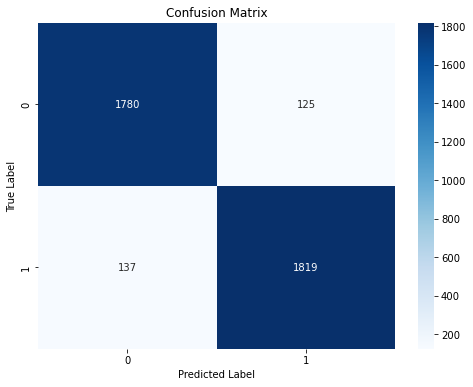

In [114]:
# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

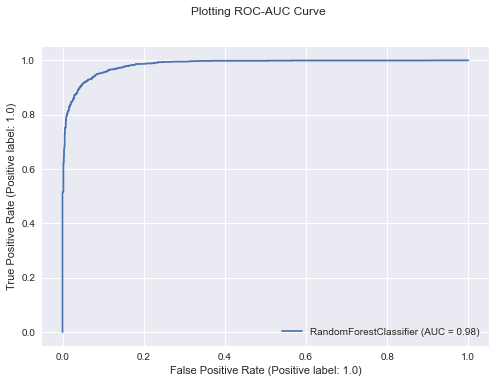

In [115]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plt.style.use('seaborn')
ROC_AUC = metrics.plot_roc_curve(model, X_test, y_test)
ROC_AUC.figure_.suptitle("Plotting ROC-AUC Curve")
plt.show()

We have really got the great AUC score, which is 0.98

In [116]:
import joblib
joblib.dump(model, "Rainfall_Weather_Forecasting_Prediction.pkl")

['Rainfall_Weather_Forecasting_Prediction.pkl']

# Now let's predict the results

In [117]:
Pre=np.array(y_test)
new_predict=np.array(model.predict(X_test))
Prediction = pd.DataFrame({"original":Pre,"predicted":new_predict},index= range(len(Pre)))
Prediction

,original,predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3856,0.0,0.0
3857,0.0,0.0
3858,0.0,0.0
3859,1.0,1.0


This is the final predicted results of "RainTomorrow". Now , we'll predict the rainfall.

In [120]:
Df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,0.0,13.4,22.9,0.6,5.389395,7.632205,0.0,44.0,0.0,0.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,0.0,7.4,25.1,0.0,5.389395,7.632205,1.0,44.0,1.0,1.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,0.0,12.9,25.7,0.0,5.389395,7.632205,2.0,46.0,0.0,1.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,0.0,9.2,28.0,0.0,5.389395,7.632205,3.0,24.0,2.0,2.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,0.0,17.5,32.3,1.0,5.389395,7.632205,0.0,41.0,3.0,3.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


In [121]:
X = Df.drop("Rainfall", axis=1)
y = Df["Rainfall"]

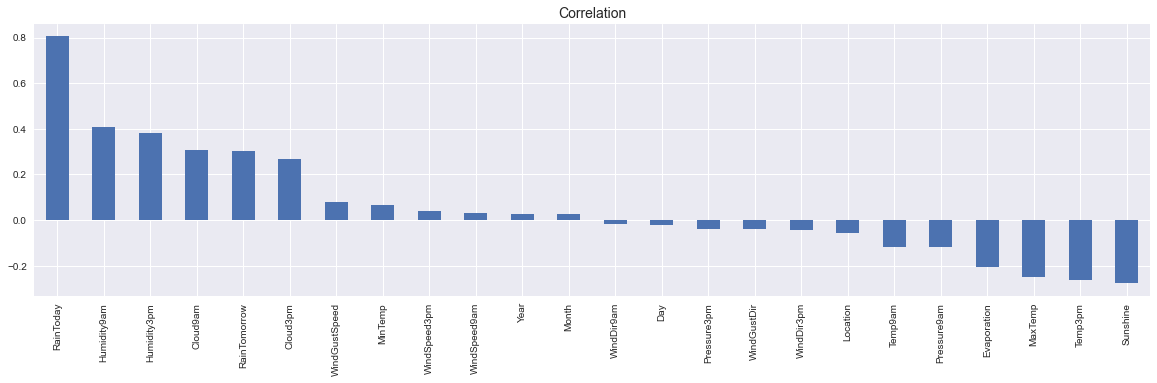

In [122]:
plt.figure(figsize=(20,5))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar', grid=True)
plt.title('Correlation',fontsize=14)
plt.show()

In [123]:
X.shape

(8425, 24)

In [124]:
y.value_counts()

0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()
X = pd.DataFrame(Std_scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.595715,0.038425,-1.570089e-01,2.305893e-16,1.257472e-15,-1.630720,0.277710,-1.819595,-1.680757,0.607461,...,-1.308665,1.413459,3.862851e-16,-0.153712,-0.108138,-0.556099,-0.556282,-1.677733,1.616696,-1.658896
1,-1.595715,-1.076989,2.028121e-01,2.305893e-16,1.257472e-15,-1.401866,0.277710,-1.582493,-1.465590,-0.972321,...,-1.196072,0.000000,3.862851e-16,-0.100217,0.312348,-0.556099,-0.556282,-1.563926,1.616696,-1.658896
2,-1.595715,-0.054526,3.009450e-01,2.305893e-16,1.257472e-15,-1.173012,0.422897,-1.819595,-1.465590,0.508725,...,-1.051309,0.000000,-1.088680e+00,0.577390,0.127334,-0.556099,-0.556282,-1.450120,1.616696,-1.658896
3,-1.595715,-0.742365,6.771214e-01,2.305893e-16,1.257472e-15,-0.944157,-1.174166,-1.345391,-1.250422,-0.281166,...,-0.391836,0.000000,3.862851e-16,0.060269,0.682376,-0.556099,-0.556282,-1.336313,1.616696,-1.658896
4,-1.595715,0.800625,1.380408e+00,2.305893e-16,1.257472e-15,-1.630720,0.059928,-1.108288,-1.035255,-0.676112,...,-1.485596,1.001777,1.520830e+00,0.006773,1.220599,-0.556099,-0.556282,-1.222506,1.616696,-1.658896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.084703,-1.932140,-7.523137e-02,2.305893e-16,1.257472e-15,1.573242,-0.666009,-1.345391,-0.174586,-0.083694,...,0.814518,0.000000,3.862851e-16,-1.366273,-0.007221,-0.556099,-0.556282,0.598400,-0.128611,1.980423
8421,2.084703,-1.783418,2.355231e-01,2.305893e-16,1.257472e-15,-0.715303,-1.319354,-1.345391,0.901251,-0.083694,...,0.621501,0.000000,3.862851e-16,-1.223619,0.345987,-0.556099,-0.556282,0.712207,-0.128611,1.980423
8422,2.084703,-1.448794,4.972110e-01,2.305893e-16,1.257472e-15,-0.486448,-0.230447,-1.345391,-1.680757,-0.478639,...,0.251553,0.000000,3.862851e-16,-0.938310,0.615099,-0.556099,-0.556282,0.826013,-0.128611,1.980423
8423,2.084703,-1.002628,5.135665e-01,2.305893e-16,1.257472e-15,1.115533,-0.883791,-0.634083,0.901251,-0.083694,...,0.203299,-0.644950,-1.088680e+00,-0.474684,0.598279,-0.556099,-0.556282,0.939820,-0.128611,1.980423


<AxesSubplot:xlabel='Rainfall', ylabel='count'>

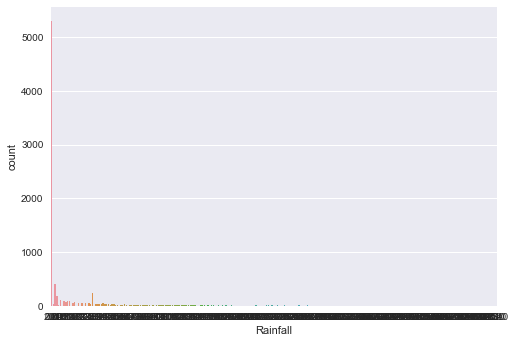

In [128]:
sns.countplot(y)

In [132]:
Df.drop(['Temp3pm','Pressure9am','Pressure3pm', 'Temp9am', 'MaxTemp'],axis =1, inplace=True)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [142]:
rf = RandomForestRegressor()
max_accuracy = 0
max_random = 0

for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    rf.fit(X_train,y_train)
    
    predict =rf.predict(X_test)
    R2 = r2_score(y_test,predict)
    if R2>max_accuracy:
        max_accuracy=R2
        max_random = i
print("R2 score is - ", max_accuracy, "at the random state", max_random )

R2 score is -  0.7540317291033629 at the random state 15


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [145]:
Model2 = [DecisionTreeRegressor(),Lasso(),AdaBoostRegressor(),SVR()]

In [147]:
from sklearn.model_selection import KFold

for mod in Model2:
    print("Accuracy of a Model   :", mod)
    mod.fit(X_train,y_train)
    predict_mod = mod.predict(X_test)
    print("Mean Square Error     :", mean_squared_error(y_test,predict_mod, squared=False))
    
    print("R2 Score is      :", r2_score(y_test,predict_mod))
     
    mscore = cross_val_score(mod,X,y, cv=5).mean()
    print("CV Score  :", mscore)

    print("R2 score - CV Score      :", r2_score(y_test,predict_mod)-mscore)
    print("-----------------------------------------------------------------------------")

Accuracy of a Model   : DecisionTreeRegressor()
Mean Square Error     : 15.137872996042889
R2 Score is      : -1.8382625949289317
CV Score  : 0.1710203060673107
R2 score - CV Score      : -2.0092829009962423
-----------------------------------------------------------------------------
Accuracy of a Model   : Lasso()
Mean Square Error     : 7.812907716376911
R2 Score is      : 0.2439539506345867
CV Score  : 0.22917625400343758
R2 score - CV Score      : 0.014777696631149112
-----------------------------------------------------------------------------
Accuracy of a Model   : AdaBoostRegressor()
Mean Square Error     : 20.008722144392095
R2 Score is      : -3.9586284276868673
CV Score  : -2.360291224670155
R2 score - CV Score      : -1.5983372030167122
-----------------------------------------------------------------------------
Accuracy of a Model   : SVR()
Mean Square Error     : 8.005638756677683
R2 Score is      : 0.20619315821070583
CV Score  : 0.16992547186429383
R2 score - CV Score

# Hyperparameter Tuning for Rainfall

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [152]:
grid_parameter = {'alpha': [0.01, 0.1, 1.0, 10.0],'max_iter': [1000, 2000, 3000], 'random_state': list(range(0,20))}

In [153]:
Gsv = GridSearchCV(Lasso(),grid_parameter, cv=5)

In [154]:
Gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'max_iter': [1000, 2000, 3000],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19]})

In [155]:
Gsv.best_params_

{'alpha': 0.1, 'max_iter': 1000, 'random_state': 0}

In [157]:
model2 =Lasso(alpha= 0.1, max_iter = 1000, random_state = 0)
model2.fit(X_train,y_train)
m_score_test= model2.score(X_test,y_test)
pred2 = model2.predict(X_test)
print("R2 score", r2_score(y_test,pred2)*100)
print("CV score", cross_val_score(model2,X,y,cv=5).mean())
print("Mean Square Error     :", mean_squared_error(y_test,pred2, squared=False))

R2 score 27.79896326750565
CV score 0.24370431733063178
Mean Square Error     : 7.6350219019257946


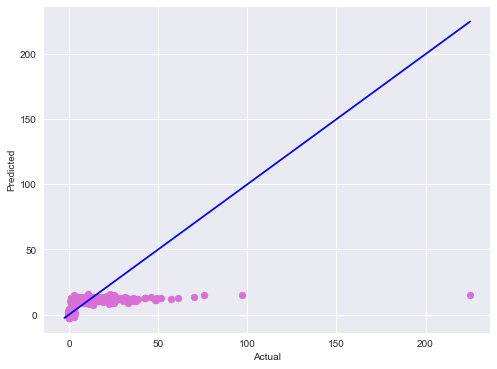

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred2, c='orchid')
plt_max=max(max(pred2), max(y_test))
plt_min=min(min(pred2), min(y_test))
plt.plot([plt_max, plt_min], [plt_max, plt_min], 'b-')
plt.xlabel('Actual',fontsize=10)
plt.ylabel('Predicted',fontsize=10)
plt.show()

In [162]:
import joblib
joblib.dump(model, "Rainfall_Weather_Forecasting_Rainfall_Prediction.pkl")

['Rainfall_Weather_Forecasting_Rainfall_Prediction.pkl']

In [163]:
Pre2=np.array(y_test)
new_predict2=np.array(model2.predict(X_test))
Prediction2 = pd.DataFrame({"original":Pre2,"predicted":new_predict2},index= range(len(Pre2)))
Prediction2

,original,predicted
0,0.0,0.031020
1,0.0,-0.436992
2,0.0,-0.372906
3,0.0,-1.359894
4,0.0,-0.122869
...,...,...
1680,0.0,-1.138906
1681,2.0,10.599071
1682,0.0,-0.031033
1683,0.0,0.503480
